# Task 2.5 - CNN Real Data Recognition - Handwriting

## Table of Contents

#### 1. Importing Libraries
#### 2. Training the model on the MNIST data set
#### 3. Loading and Pre-processing Handwritten Data
#### 4. Testing with Real Data

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from numpy import argmax
from PIL import Image
from numpy import asarray

2024-09-23 17:03:34.809837: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 2. Training the model on the MNIST data set

In [2]:
tf.random.set_seed(42)

In [3]:
hand = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
hand[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [5]:
(X_train, y_train), (X_test, y_test) = hand

In [6]:
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 180000

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

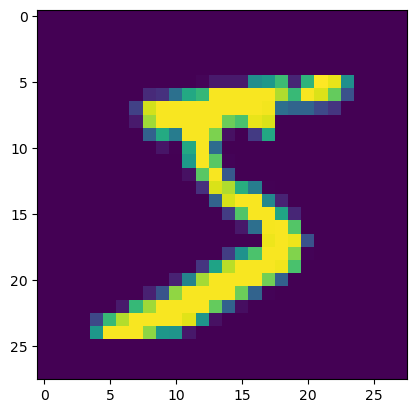

In [10]:
plt.imshow(X_train[0])

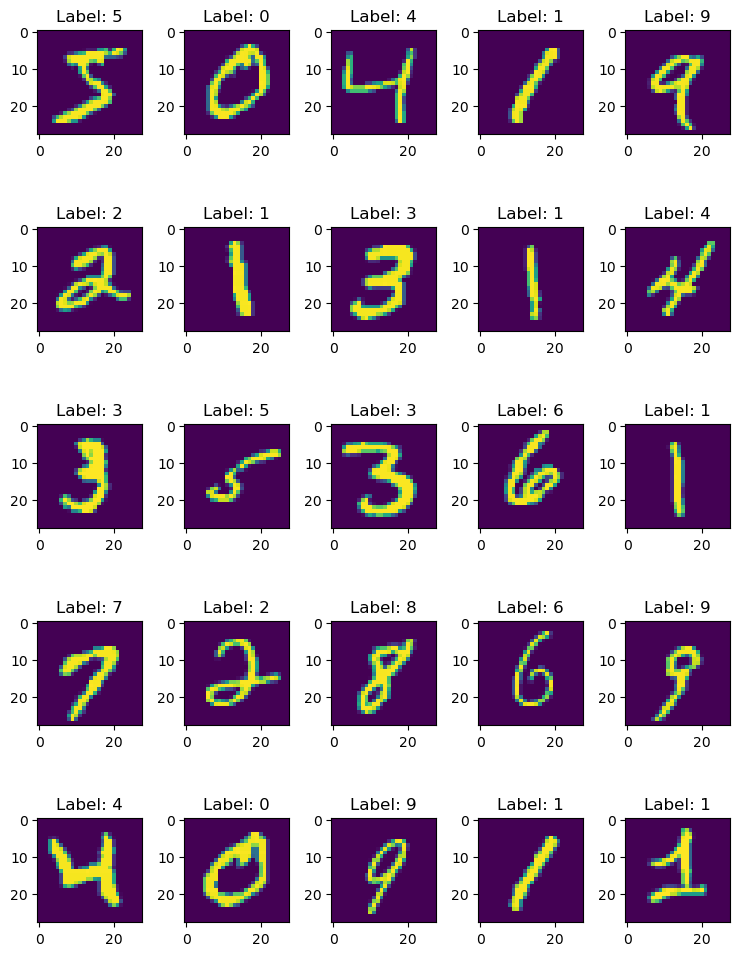

In [11]:
num = 25
images = X_train[:num]
labels = y_train[:num]

num_row = 5
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [12]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [14]:
X_train /= 255
X_test /= 255

In [16]:
# 6. Preprocess class labels
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [17]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [18]:
for label in range(10):
    one_hot = (Y_train[label]).astype(np.int32)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  1  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  3  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
label:  5  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  6  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  7  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  8  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  9  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]


In [19]:
epochs = 30
batch_size = 16
n_hidden = 32

#timesteps = len(X_train[0])
#input_dim = len(X_train[0][0])
#n_classes = _count_classes(Y_train)

# 7. Define model architecture
model = Sequential()
 
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/Users/giadairene/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# 9. Fit model on training data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 52ms/step - accuracy: 0.8735 - loss: 0.3971
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3596s 2s/step - accuracy: 0.9737 - loss: 0.0870
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 104s 55ms/step - accuracy: 0.9804 - loss: 0.0662
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 105s 56ms/step - accuracy: 0.9839 - loss: 0.0529
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 98s 53ms/step - accuracy: 0.9852 - loss: 0.0476
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 104s 55ms/step - accuracy: 0.9870 - loss: 0.0412
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 146s 58ms/step - accuracy: 0.9892 - loss: 0.0375
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 108s 57ms/step - accuracy: 0.9893 - loss: 0.0347
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 104s 56ms/step - accuracy: 0.9903 - loss: 0.0302
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 153s 61ms/step - accuracy: 0.9910 - loss: 0.0290


In [21]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=2)

313/313 - 3s - 8ms/step - accuracy: 0.9900 - loss: 0.0396


In [22]:
#predict first 4 images in the test set
model.predict(X_test[:4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


array([[8.8905880e-16, 7.4309664e-10, 6.4216583e-11, 5.5338054e-09,
        2.0521821e-13, 9.8126165e-14, 1.8771290e-19, 1.0000000e+00,
        3.5506374e-13, 4.9427323e-10],
       [1.0448829e-12, 6.2293698e-11, 1.0000000e+00, 4.7327695e-14,
        1.6585919e-17, 6.8424220e-22, 3.7288704e-14, 3.0504574e-15,
        5.4204243e-15, 1.0916760e-17],
       [6.7202499e-10, 9.9999619e-01, 2.1678342e-07, 3.0626440e-10,
        2.5861848e-06, 1.1711291e-08, 7.8707663e-09, 6.7486025e-07,
        2.5435764e-07, 3.1279168e-08],
       [9.9999976e-01, 1.8432486e-12, 8.9618597e-11, 3.3580879e-12,
        2.5807470e-13, 7.4244194e-10, 1.9954609e-07, 1.4212966e-12,
        5.4010481e-09, 1.1523059e-08]], dtype=float32)

In [23]:
sumarray = np.sum(model.predict(X_test[:4]), axis=1)
sumarray

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([1.        , 1.        , 1.        , 0.99999994], dtype=float32)

In [24]:
#actual results for first 4 images in test set
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [25]:
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
[[ 973    0    1    1    0    0    3    0    2    0]
 [   0 1127    0    3    0    1    2    2    0    0]
 [   1    0 1028    0    0    0    0    3    0    0]
 [   0    0    1 1007    0    1    0    0    1    0]
 [   0    0    0    0  970    0    4    0    2    6]
 [   0    0    0    6    0  883    2    0    1    0]
 [   3    1    0    1    1    4  946    0    2    0]
 [   0    0    6    3    0    1    0 1016    1    1]
 [   0    0    1    5    0    1    0    1  964    2]
 [   1    0    0    3    2    7    0    5    5  986]]


## 3. Loading and Pre-processing Handwritten Data

In [27]:
path = r'/Users/giadairene/Documents/CareerFoundry Data Analytics/Machine Learning with Python/ClimateWins'
path

'/Users/giadairene/Documents/CareerFoundry Data Analytics/Machine Learning with Python/ClimateWins'

In [29]:
# Check an image example

img = Image.open(os.path.join(path, '02 Data/Prepared/Handwritten-Numbers/0.png'))
print(img.format)
print(img.size)
print(img.mode)

PNG
(537, 894)
LA


In [31]:
# Define the list of numbers (0-9) for the labels
labels = list(range(10))

# Initialize lists to store the image data and labels
images = []
image_labels = []

# Loop through all numbers (0-9) and load corresponding images
for label in labels:
    # Open the image
    img_path = os.path.join(path, '02 Data/Prepared/Handwritten-Numbers', f'{label}.png')
    img = Image.open(img_path)
    
    # Convert the image to grayscale (one single channel)
    img = img.convert('L')
    
    # Resize the image to 28x28
    newsize = (28, 28)
    img_resized = img.resize(newsize)
    
    # Convert the image to a numpy array
    img_array = np.asarray(img_resized)
    
    # Normalize the image data to the range [0, 1]
    img_array = img_array / 255.0
    
    # Reshape to match the CNN input format: (28, 28, 1)
    img_array = img_array.reshape(28, 28, 1)

    # Append the processed image and label to the respective lists
    images.append(img_array)
    image_labels.append(label)

# Convert the lists to numpy arrays
images = np.array(images)
image_labels = np.array(image_labels)

# One-hot encode the labels for CNN training
image_labels = to_categorical(image_labels, num_classes=10)

# Check the shapes of the images and labels
print("Images shape:", images.shape)  # Should be (10, 28, 28, 1) for 10 images
                                      # each resized to 28x28 and with 1 channel (grayscale)
print("Labels shape:", image_labels.shape)  # Should be (10, 10) for 10 images 
                                            #with 10 possible class labels (0-9)

Images shape: (10, 28, 28, 1)
Labels shape: (10, 10)


## 4. Testing with Real Data

In [33]:
# Rename arrays

X_real_test = images  # Your preprocessed handwritten images
y_real_test = labels  # The true labels (0-9) for your handwritten images

In [34]:
# Run the model's predictions on the handwritten data
predictions = model.predict(X_real_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [35]:
# Get the predicted class (the index of the maximum value in the output array)

predicted_labels = np.argmax(predictions, axis=1)

In [37]:
# Calculate accuracy

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_real_test, predicted_labels)
print(f"Model accuracy on handwritten data: {accuracy * 100:.2f}%")

Model accuracy on handwritten data: 50.00%


In [38]:
# Display the predicted and true labels

for i, (pred, actual) in enumerate(zip(predicted_labels, y_real_test)):
    print(f"Image {i}: Predicted = {pred}, Actual = {actual}")

Image 0: Predicted = 0, Actual = 0
Image 1: Predicted = 4, Actual = 1
Image 2: Predicted = 2, Actual = 2
Image 3: Predicted = 2, Actual = 3
Image 4: Predicted = 4, Actual = 4
Image 5: Predicted = 5, Actual = 5
Image 6: Predicted = 6, Actual = 6
Image 7: Predicted = 4, Actual = 7
Image 8: Predicted = 2, Actual = 8
Image 9: Predicted = 8, Actual = 9
